# Paris Airbnb Market Analysis: Impact of 2015 Regulations

  This project analyzes Airbnb listing data for Paris to understand the impact of regulations introduced in 2015. Our analysis reveals that these regulations, aimed at controlling the growth of short-term rentals, led to a significant decrease in new host registrations. This reduction in supply, in turn, correlated with a general increase in average listing prices. Deeper analysis shows that this price hike was not uniform; it was most pronounced in central, high-demand neighborhoods and for large-capacity properties, while surprisingly, Superhosts' prices saw a decrease.

## Data Loading and Initial Exploration

In [1]:
import pandas as pd

listings = pd.read_csv(
    "C:/Users/Lenovo/Downloads/Airbnb+Data/Airbnb Data/Listings.csv", encoding="ISO-8859-1", low_memory=False)

listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [2]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

## Data Cleaning and Preprocessing

In [3]:
# Convert the 'host_since' column to datetime format

listings["host_since"] = pd.to_datetime(listings["host_since"])

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [4]:
# Filter Paris listings and selecting key columns

paris_listings = listings.query("city=='Paris'").loc[:, ["host_since", "neighbourhood", "accommodates", "price", "host_is_superhost"]]

In [5]:
# Re-checking the dataframe information

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   host_since         64657 non-null  datetime64[ns]
 1   neighbourhood      64690 non-null  object        
 2   accommodates       64690 non-null  int64         
 3   price              64690 non-null  int64         
 4   host_is_superhost  64657 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [6]:
# Check for zero values in 'accommodates' and 'price'
# Identify potential data entry errors or outliers

print("\nNumber of listings with zero accommodates or price:")
paris_listings.query("accommodates == 0 or price == 0").count()


Number of listings with zero accommodates or price:


host_since           62
neighbourhood        62
accommodates         62
price                62
host_is_superhost    62
dtype: int64

In [7]:
# Remove these rows as they are likely not valid listings
paris_listings = paris_listings.query("accommodates != 0 and price != 0")

## Exploratory Data Analysis (EDA)

### Analysis 1: New Hosts vs. Average Price Over Time

- This analysis uses resampling to aggregate data on a yearly basis, providing a high-level view of how new host registrations and average prices have changed over time.

In [8]:
# Resample the data on a yearly basis ('Y')
# 'neighbourhood' count serves as a proxy for the number of new listings/hosts
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({"neighbourhood": "count", "price": "mean"})
)

paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8867,114.211345


In [9]:
# Rename columns for clarity

paris_listings_over_time.rename(columns={"neighbourhood": "new_hosts"}, inplace=True)

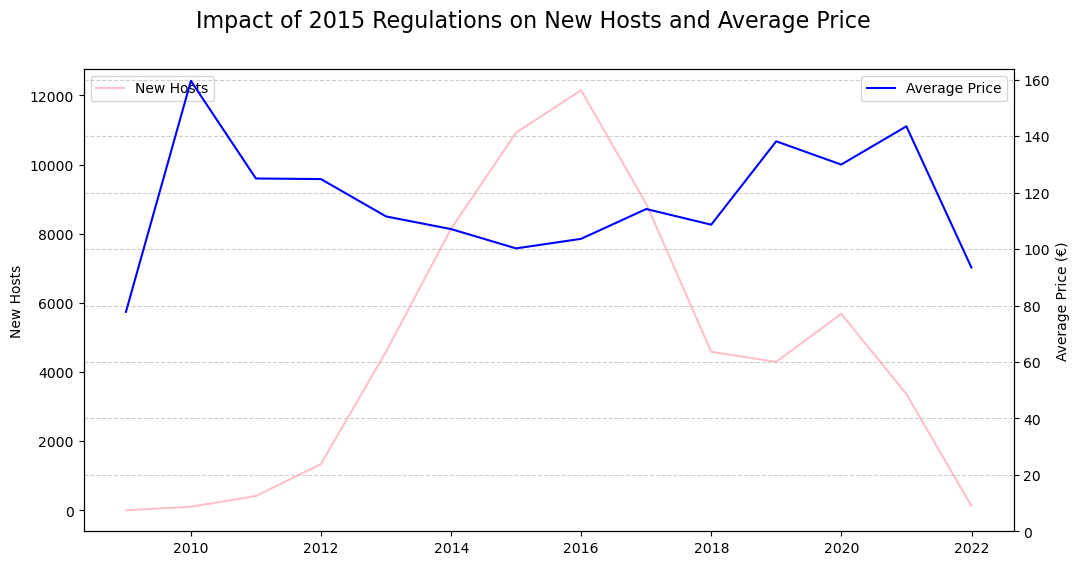

In [10]:
import matplotlib.pyplot as plt

# Plotting new hosts and average price on a dual-axis chart
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(paris_listings_over_time.index, paris_listings_over_time["new_hosts"], label="New Hosts", c="pink")
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()
ax2.plot(paris_listings_over_time.index, paris_listings_over_time["price"], label="Average Price", c="blue")
ax2.set_ylabel("Average Price (€)")
ax2.set_ylim(0)

fig.suptitle("Impact of 2015 Regulations on New Hosts and Average Price", fontsize=16)
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- Insight: The dual-axis chart clearly shows a peak in new host registrations around 2015, followed by a sharp decline. Conversely, the average price began a general upward trend after 2015, suggesting that the regulations reduced supply and consequently drove up prices

### Analysis 2: Price Change by Neighbourhood

- We will now investigate how the regulations affected different neighborhoods by comparing average prices before and after 2015.

In [11]:
# Create a 'regulation_period' column to categorize listings

paris_listings["regulation_period"] = paris_listings["host_since"].apply(lambda x: "Before 2015" if x.year < 2015 else "After 2015")

In [12]:
# Calculate average prices by neighborhood and period

price_by_neighbourhood_period = (
    paris_listings
    .groupby(["neighbourhood", "regulation_period"])
    .agg({"price": "mean"})
    .reset_index()
)

price_by_neighbourhood_period.head()

,neighbourhood,regulation_period,price
0,Batignolles-Monceau,After 2015,105.522279
1,Batignolles-Monceau,Before 2015,97.792952
2,Bourse,After 2015,162.847746
3,Bourse,Before 2015,128.170468
4,Buttes-Chaumont,After 2015,85.400667


In [13]:
# Pivot the table for easier comparison

price_comparison = price_by_neighbourhood_period.pivot(index="neighbourhood", columns="regulation_period", values="price")

In [14]:
# Calculate the percentage change

price_comparison["price_change_percentage"] = ((price_comparison["After 2015"] - price_comparison["Before 2015"]) / price_comparison["Before 2015"]) * 100

In [15]:
# Sort and print the results

print("\nPrice change percentage by neighborhood:")
print(price_comparison.sort_values("price_change_percentage", ascending=False).head(10))


Price change percentage by neighborhood:
regulation_period    After 2015  Before 2015  price_change_percentage
neighbourhood                                                        
Bourse               162.847746   128.170468                27.055591
Louvre               190.838636   150.470476                26.827961
Gobelins             104.816864    84.714474                23.729582
Elysee               223.491115   182.690249                22.333357
Opera                124.902584   109.115688                14.468036
Palais-Bourbon       164.254867   145.402208                12.965868
Temple               143.614286   131.573238                 9.151593
Batignolles-Monceau  105.522279    97.792952                 7.903767
Buttes-Chaumont       85.400667    79.197667                 7.832301
Observatoire         104.688691    97.311674                 7.580814


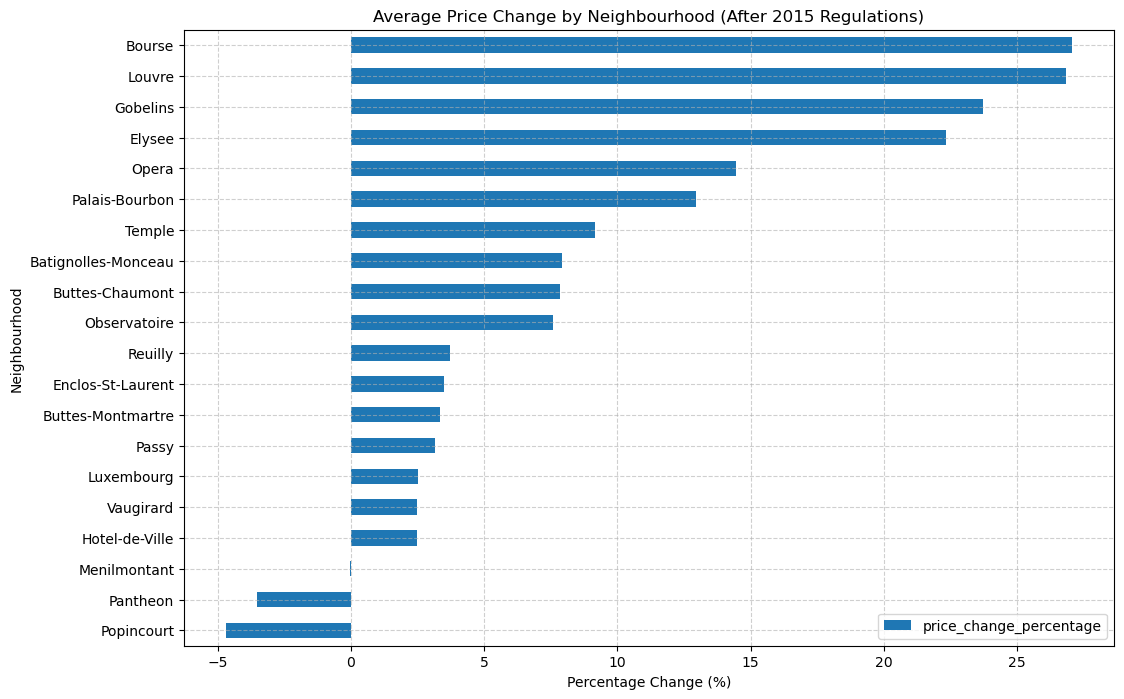

In [16]:
import matplotlib.pyplot as plt

# Convert the index of neighbourhood names into a column
price_comparison = price_comparison.reset_index()

# Sort by price_change_percentage for better visualization
price_comparison_sorted = price_comparison.sort_values("price_change_percentage")

# Plotting the horizontal bar chart
price_comparison_sorted.plot(
    kind='barh',
    x='neighbourhood',                 # Neighborhood names on the y-axis
    y='price_change_percentage',       # Percentage change on the x-axis
    title='Average Price Change by Neighbourhood (After 2015 Regulations)',
    xlabel='Percentage Change (%)',
    ylabel='Neighbourhood',
    figsize=(12, 8)
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- Insight: The price changes were not uniform across Paris. Central and tourist-heavy neighborhoods like Bourse and Louvre experienced the most significant price increases, indicating that the regulations had a more pronounced effect on these high-demand areas.

### Analysis 3: Price Change by Superhost Status

- This analysis compares the price changes for Superhosts and normal hosts, providing insight into how different segments of the hosting community were affected.


Price change percentage by host type:
regulation_period  After 2015  Before 2015  price_change_percentage
host_is_superhost                                                  
f                  116.978193   102.755409                13.841397
t                  122.692988   129.593786                -5.324945


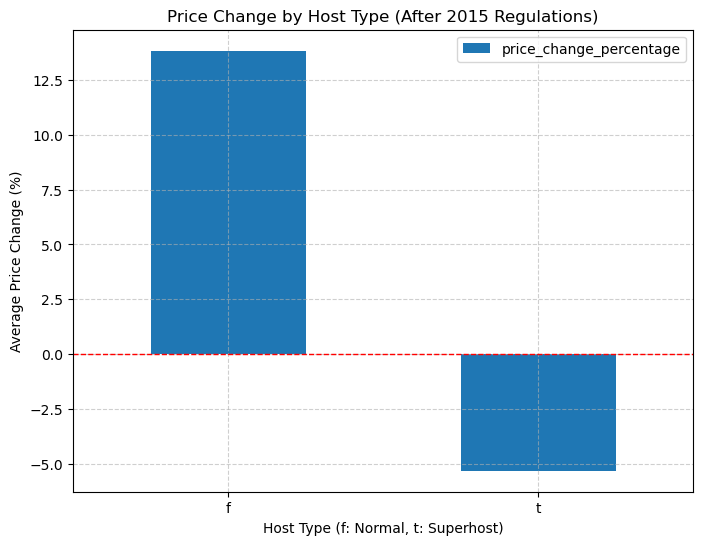

In [17]:
# Group by superhost status and regulation period
superhost_comparison = (
    paris_listings
    .groupby(["host_is_superhost", "regulation_period"])
    .agg({"price": "mean"})
    .reset_index()
)

# Pivot the table for comparison
superhost_comparison = superhost_comparison.pivot(index="host_is_superhost", columns="regulation_period", values="price")

# Calculate the percentage change
superhost_comparison["price_change_percentage"] = ((superhost_comparison["After 2015"] - superhost_comparison["Before 2015"]) / superhost_comparison["Before 2015"]) * 100

# Print the results
print("\nPrice change percentage by host type:")
print(superhost_comparison)

# Visualize the findings with a bar chart
superhost_comparison.reset_index().plot(
    kind='bar',
    x='host_is_superhost',
    y='price_change_percentage',
    title='Price Change by Host Type (After 2015 Regulations)',
    xlabel='Host Type (f: Normal, t: Superhost)',
    ylabel='Average Price Change (%)',
    rot=0,
    figsize=(8, 6)
)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- Insight: This is a surprising finding. While normal hosts (f) saw a price increase of approximately 13%, Superhosts (t) actually experienced a price decrease of around 5%. This suggests that Superhosts might have adopted a strategy of lowering prices to maintain high occupancy and positive reviews in a more competitive, supply-constrained market, while non-Superhosts were able to increase prices due to reduced competition.

### Conclusion and Key Findings

----
This comprehensive analysis of the Paris Airbnb market reveals several key insights regarding the impact of the 2015 regulations:

1. Reduced Supply, Increased Price: The regulations led to a sharp drop in the number of new hosts, which corresponded with a general increase in average listing prices. This confirms the fundamental economic principle that restricting supply can drive up market prices.

--------
2. Uneven Geographical Impact: The price increase was not uniform. Central, tourist-heavy neighborhoods like Bourse and Louvre were impacted the most, showing the highest percentage price changes.

--------
3. Differentiated Impact on Host Types: Perhaps the most compelling finding is the divergent pricing strategies between host types. Non-Superhosts saw a significant price increase, while the more professional Superhosts decreased their prices, likely as a strategic move to maintain market position and customer satisfaction.

These findings provide a rich, multi-faceted understanding of how a single regulatory event can create complex and varied ripple effects across a dynamic market.